# EuroGlobalMap Data (2019)

## Concept
EuroGlobalMap is a pan-European seamless topographic database at global level of detail. EuroGlobalMap is a vector-based product and is designed to support GIS applications and background display.
The EGM Database is intended to be used in map scale 1:1 000 000. This means that the data content is suitable for a map where 1 cm on the map indicates 10 km on the ground. Features saved in the database as lines or areas are in many cases generalised. Details are reduced mainly by feature selection, line simplification methods or by amalgamation for areas.

## EuroGlobalMap Concept for Mandatory and Optional Data Content
The quality contract is to reach a seamless dataset where information indicated in the specifications is available for the whole Europe, harmonized and produced according to the portrayal criteria and quality criteria mentioned in the specifications. However it would be difficult to reach such a level of harmonization for the whole dataset; thus the data content has to be defined according to what is of basic importance and what is optional.
The selection criteria to decide which features and attributes are of basic or optional importance have been defined according to their rate of importance for users and the number of NMAs which can commonly provide them.
The basic or CORE content of the EuroGlobalMap dataset has to be available for the whole dataset extent and is composed of the most important features and information asked by users, or the most commonly supported features and information among NMAs. The optional content is not necessarily available for the whole dataset extent and gathers information of minor importance for users or too specific to be supported by a majority of NMAs. However, when an optional feature is populated, its mandatory attributes have to be populated as well.

## Database Sources and Extent
The primary data sources used for EuroGlobalMap used to be the national data collections of the mapping agencies, possibly at similar spatial resolution. Secondary data sources, either internal or external to the mapping agencies, could also be used to fill the required information.
Since EGM v5.1 (2012), a new production process based on generalisation from EuroBoundaryMap and EuroRegionalMap has been progressively put into place. In this version, the Boundary and Hygrodraphy themes have been produced with this method.
The extent of the data set is limited to Europe.

## Modules

In [1]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
###import georaster as gr
import pandas as pd
from shapely.geometry import Point, LineString
###import pysal as ps
###from pysal.contrib.viz import mapping as maps

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Data Collection 

### Administrative Areas

#### Provinces (NUTS 3)

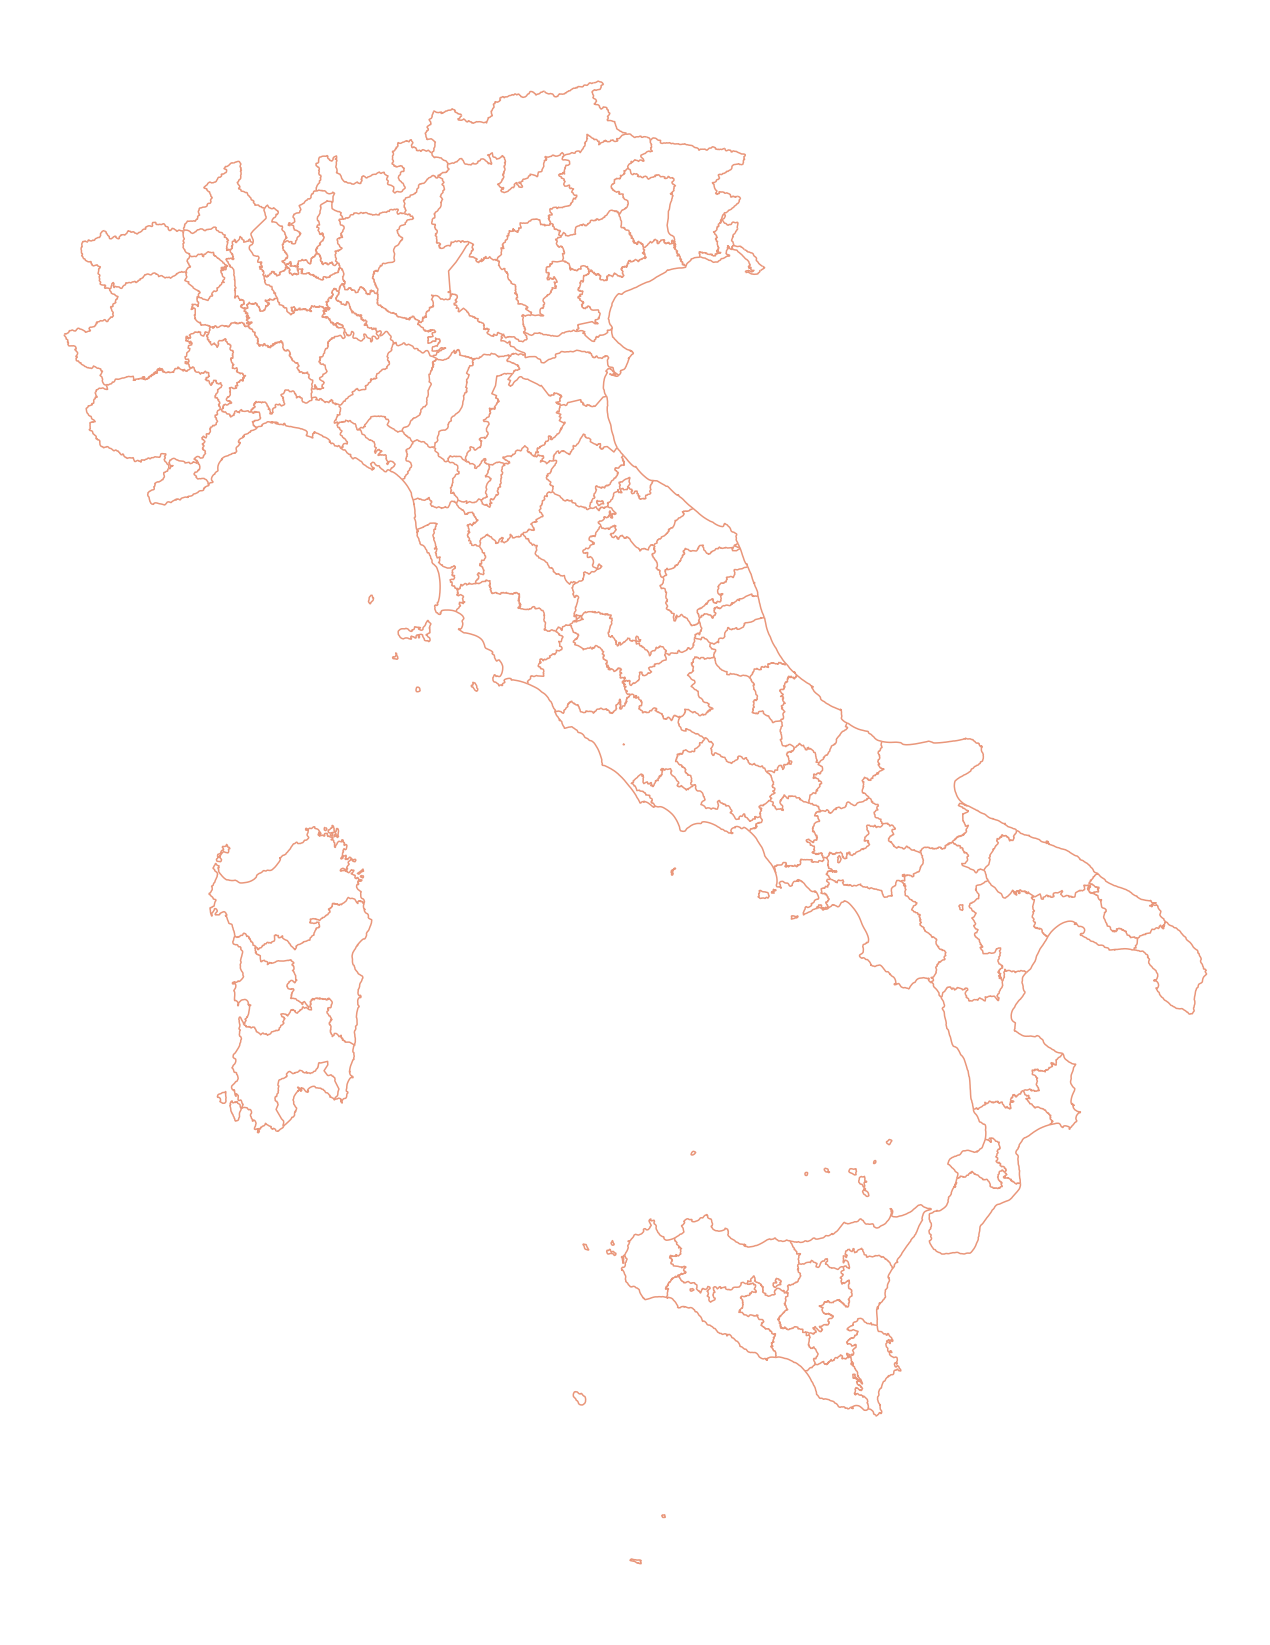

In [2]:
# Set geodata file path
provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)

# Store data
provincial_data = gpd.read_file(provinces)

# Visualize GeoDataFrame
provincial_data.plot(figsize=(30, 30),
                     color='darksalmon', 
                     edgecolor='black',
                     alpha=1).set_axis_off()

### Settlement

#### Built-up Area 1

Population ≥ 50 000 inhabitants AND total size ≥ 0.5 km2. Minimum size of a discrete area: 0.5 km2 (when the same built-up area is split into several parts). Area ≥ 0.5 km2 is used as only criteria when the number of inhabitants is unknown.
When a city is represented as several separated polygons, all the polygons are populated with the same identifier.
The population place identifier PopulatedPlaceID is the unique identifier of the city, referring to the populate place captured as the representation point for a built-up area.

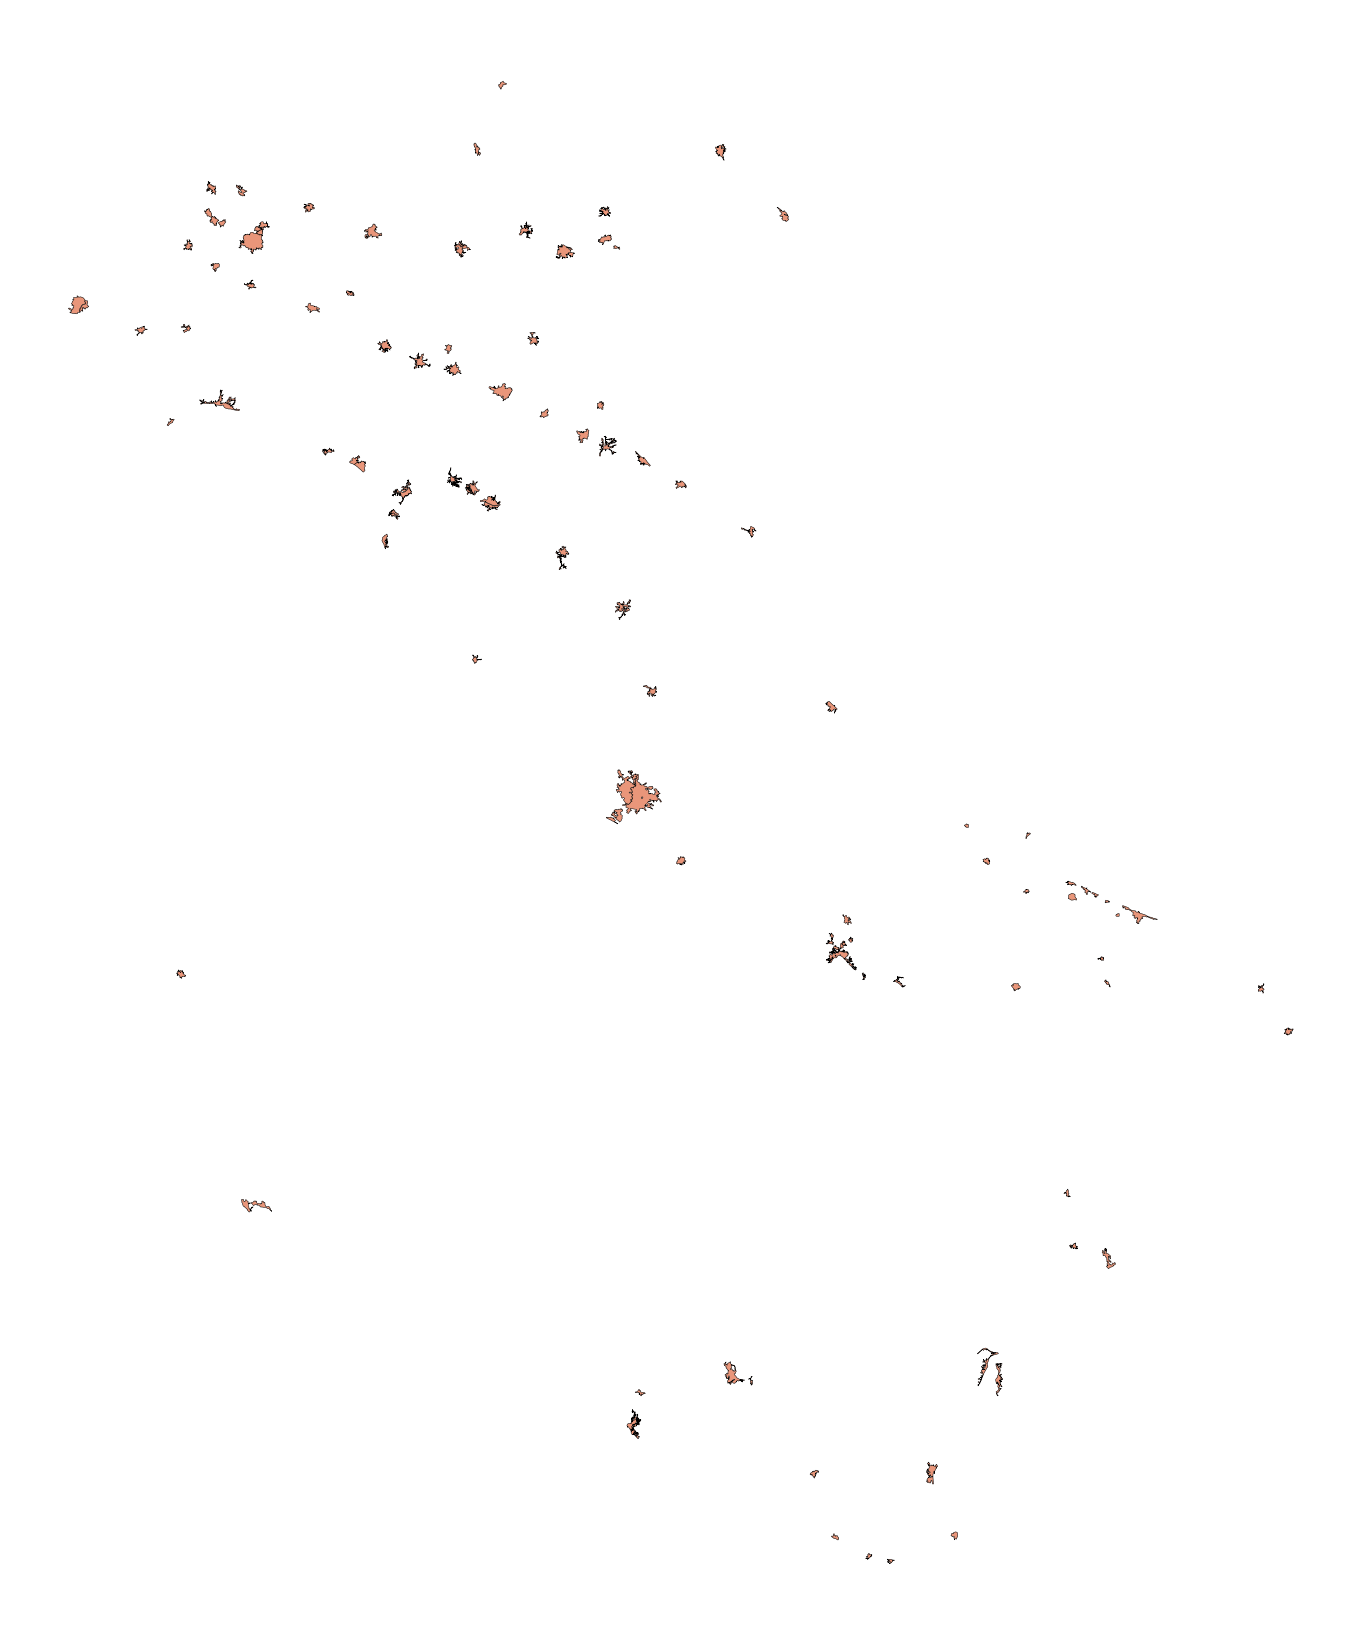

In [3]:
# Set geodata file path
buildings1 = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/BuiltupA.shp"

# Store data
builtup1_data = gpd.read_file(buildings1)

# Visualize GeoDataFrame
builtup1_data.plot(figsize=(30, 30),
                   color='darksalmon', 
                   edgecolor='black', 
                   linewidth=0.5,
                   alpha=1).set_axis_off()

#### Built-up Area 2

All built-up areas between 1 000 – 50 000 inhabitants OR if more than 50 000 but total size ≤ 0,5 km2.
Built-up areas, which have less than 1000 inhabitants but are main villages or cities of the regional/local administrative units are included. In that case it should be taken care that all regional/local administrative units have at least main village or city. If the number of inhabitants is not known, then the selection criterion is size ≤ 0.5 km2.

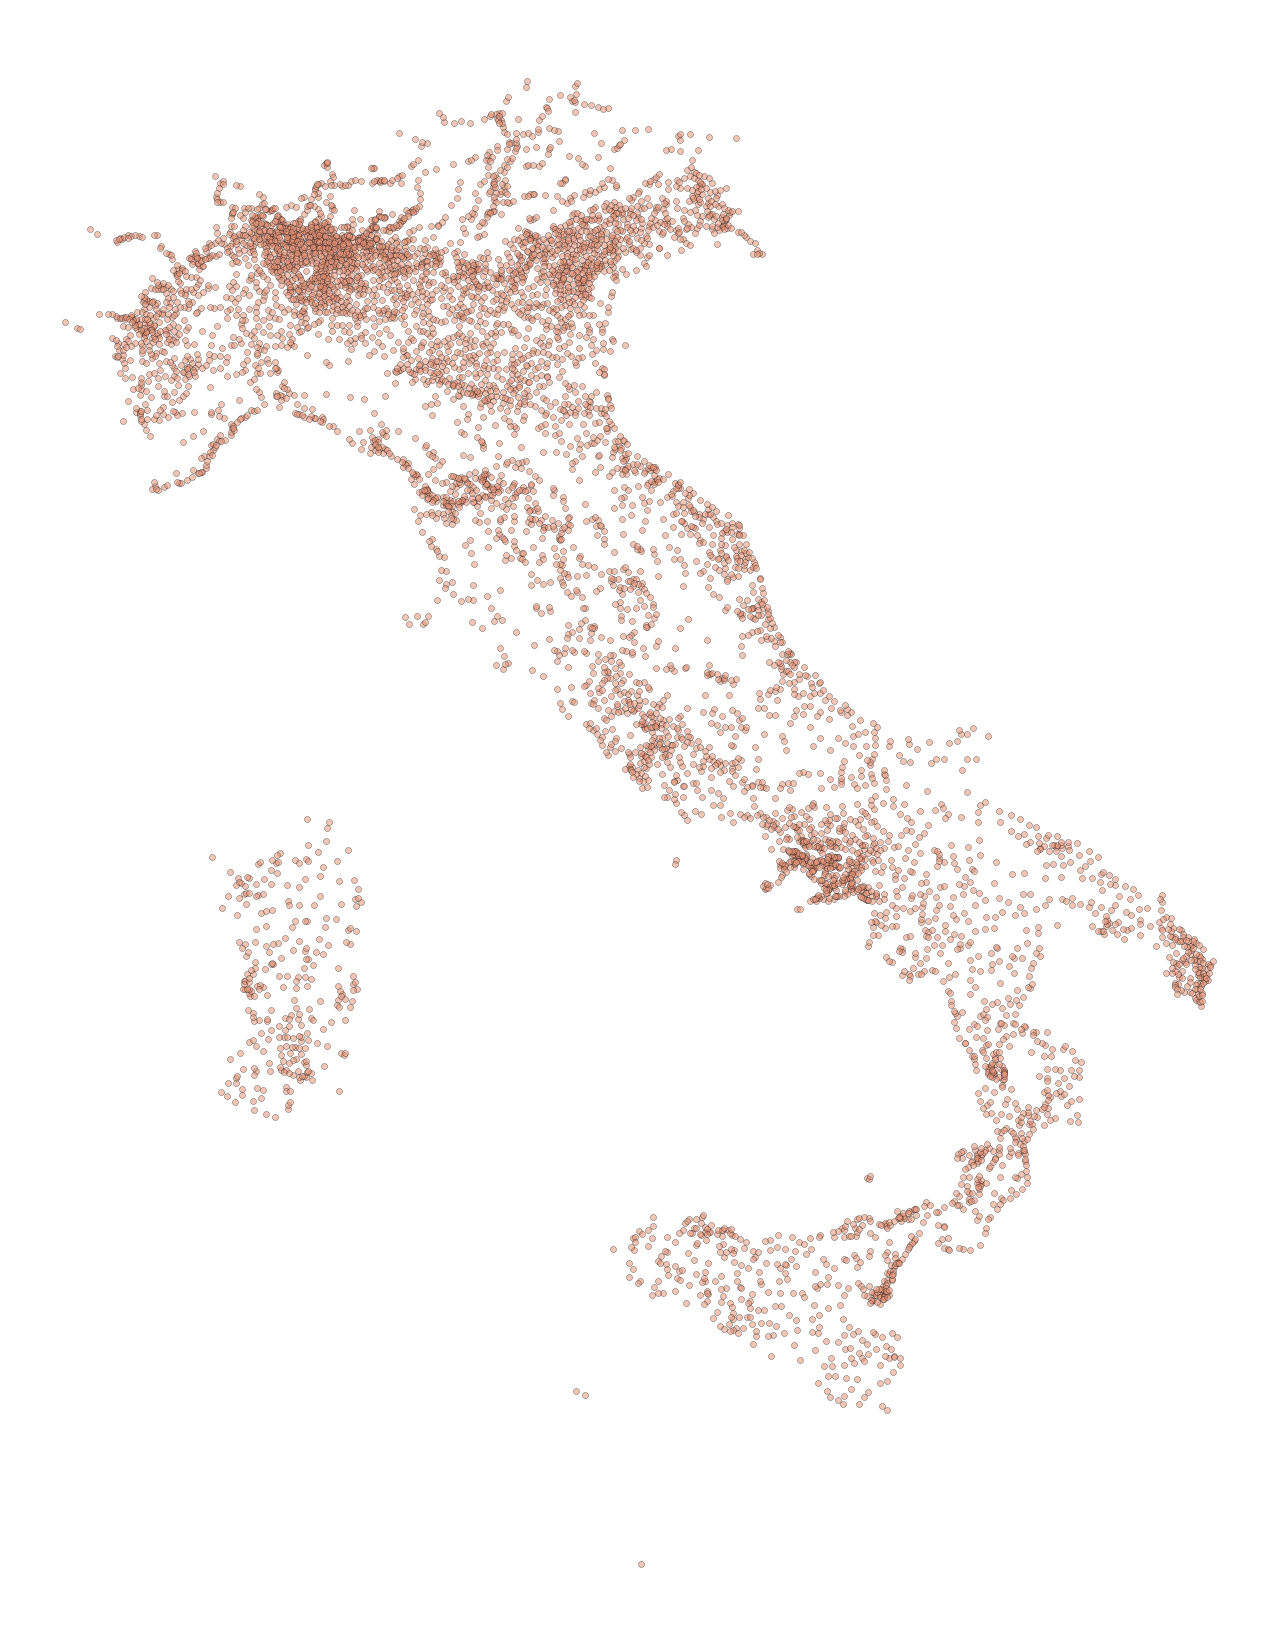

In [4]:
# Set geodata file path
buildings2 = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/BuiltupP.shp"

# Store data
builtup2_data = gpd.read_file(buildings2)

# Visualize GeoDataFrame
builtup2_data.plot(figsize=(30, 30),
                   alpha=0.55,
                   color='darksalmon', 
                   edgecolor='black', 
                   linewidth=0.5).set_axis_off()

### Transportation 

#### Railway

Railway routes used for regular transportation of goods and passengers. Important industry railways can be included. Metro lines (= underground urban railways), tram lines or streetcar lines inside city areas are excluded. Railways are represented by one line regardless of the number of tracks. Railway yards are excluded. Ending (dangle) railway lines shorter than 2 km are excluded (if not nationally important).

In [5]:
# Set geodata file path
railways = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/RailrdL.shp"

# Store data
railway_data = gpd.read_file(railways)

# Visualize GeoDataFrame
#railway_data.plot(figsize=(10, 10)).set_axis_off()

#### Railway Stations 

All railway stations and stopping places used for passenger and/or freight traffic are portrayed.

In [6]:
# Set geodata file path
railway_stations = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/RailrdC.shp"

# Store data
railway_station_data = gpd.read_file(railway_stations)

# Visualize GeoDataFrame
#railway_station_data.plot(figsize=(10, 10)).set_axis_off()

#### Roads

Roads that form up a logical transportation network at a map scale 1:1 000 000. Roads can be omitted for cartographic reasons in those areas where the road network is very dense. Low-class roads can be added if these roads are important routes in settlement structure. Roads are represented by one line regardless of the number of lanes or carriageways. Road lines shorter than 2 km are excluded. All European roads (E-roads) are included.

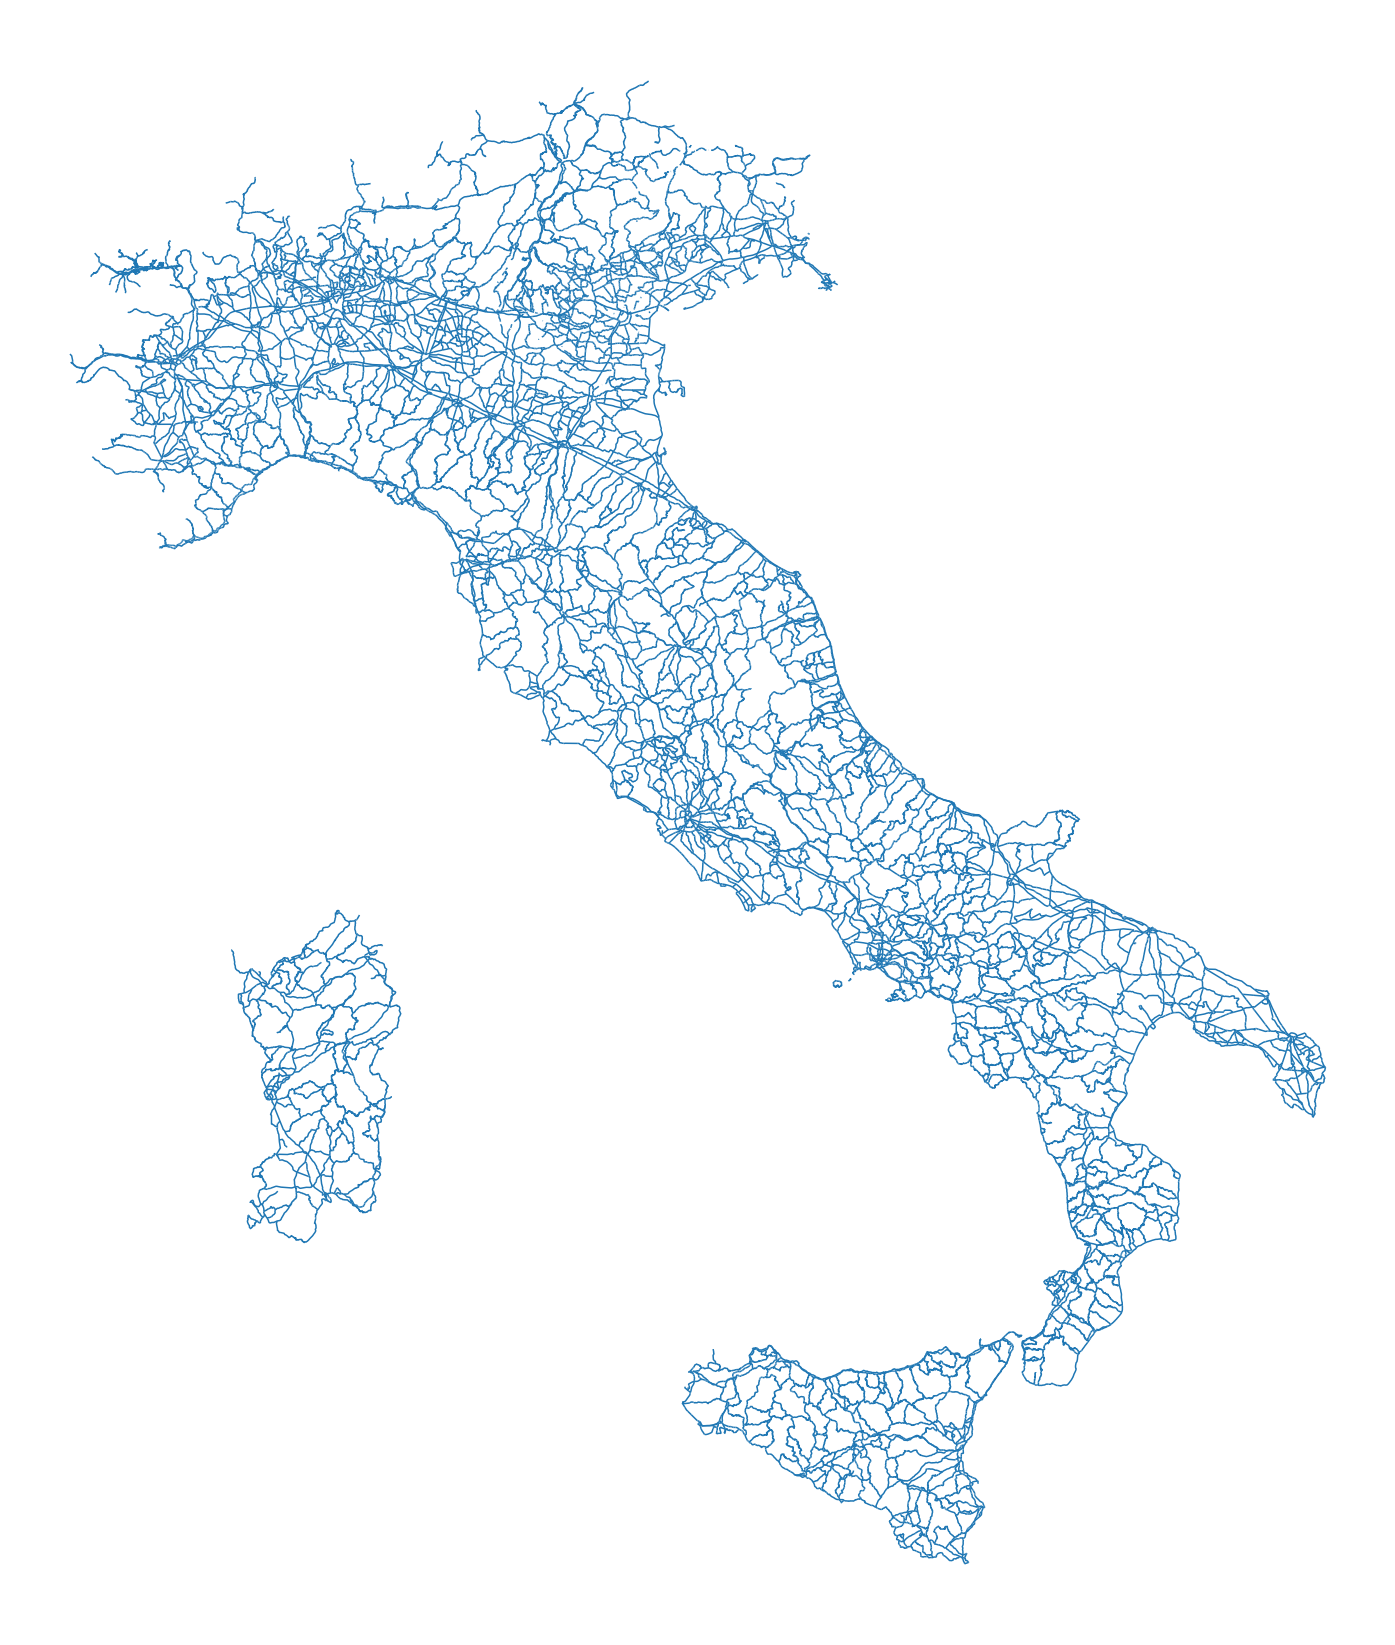

In [7]:
# Set geodata file path
roads = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/RoadL.shp"

# Store data
road_data = gpd.read_file(roads)

# Visualize GeoDataFrame
#road_data.plot(figsize=(10, 10), alpha=0.6).set_axis_off()
road_data.plot(figsize=(30, 30),color="tab:blue").set_axis_off()

#### Airports 

Areas of land or water used for landing, take-off, and movement of aircraft including associated buildings and facilities. This dataset contains all airports having regular passenger traffic.

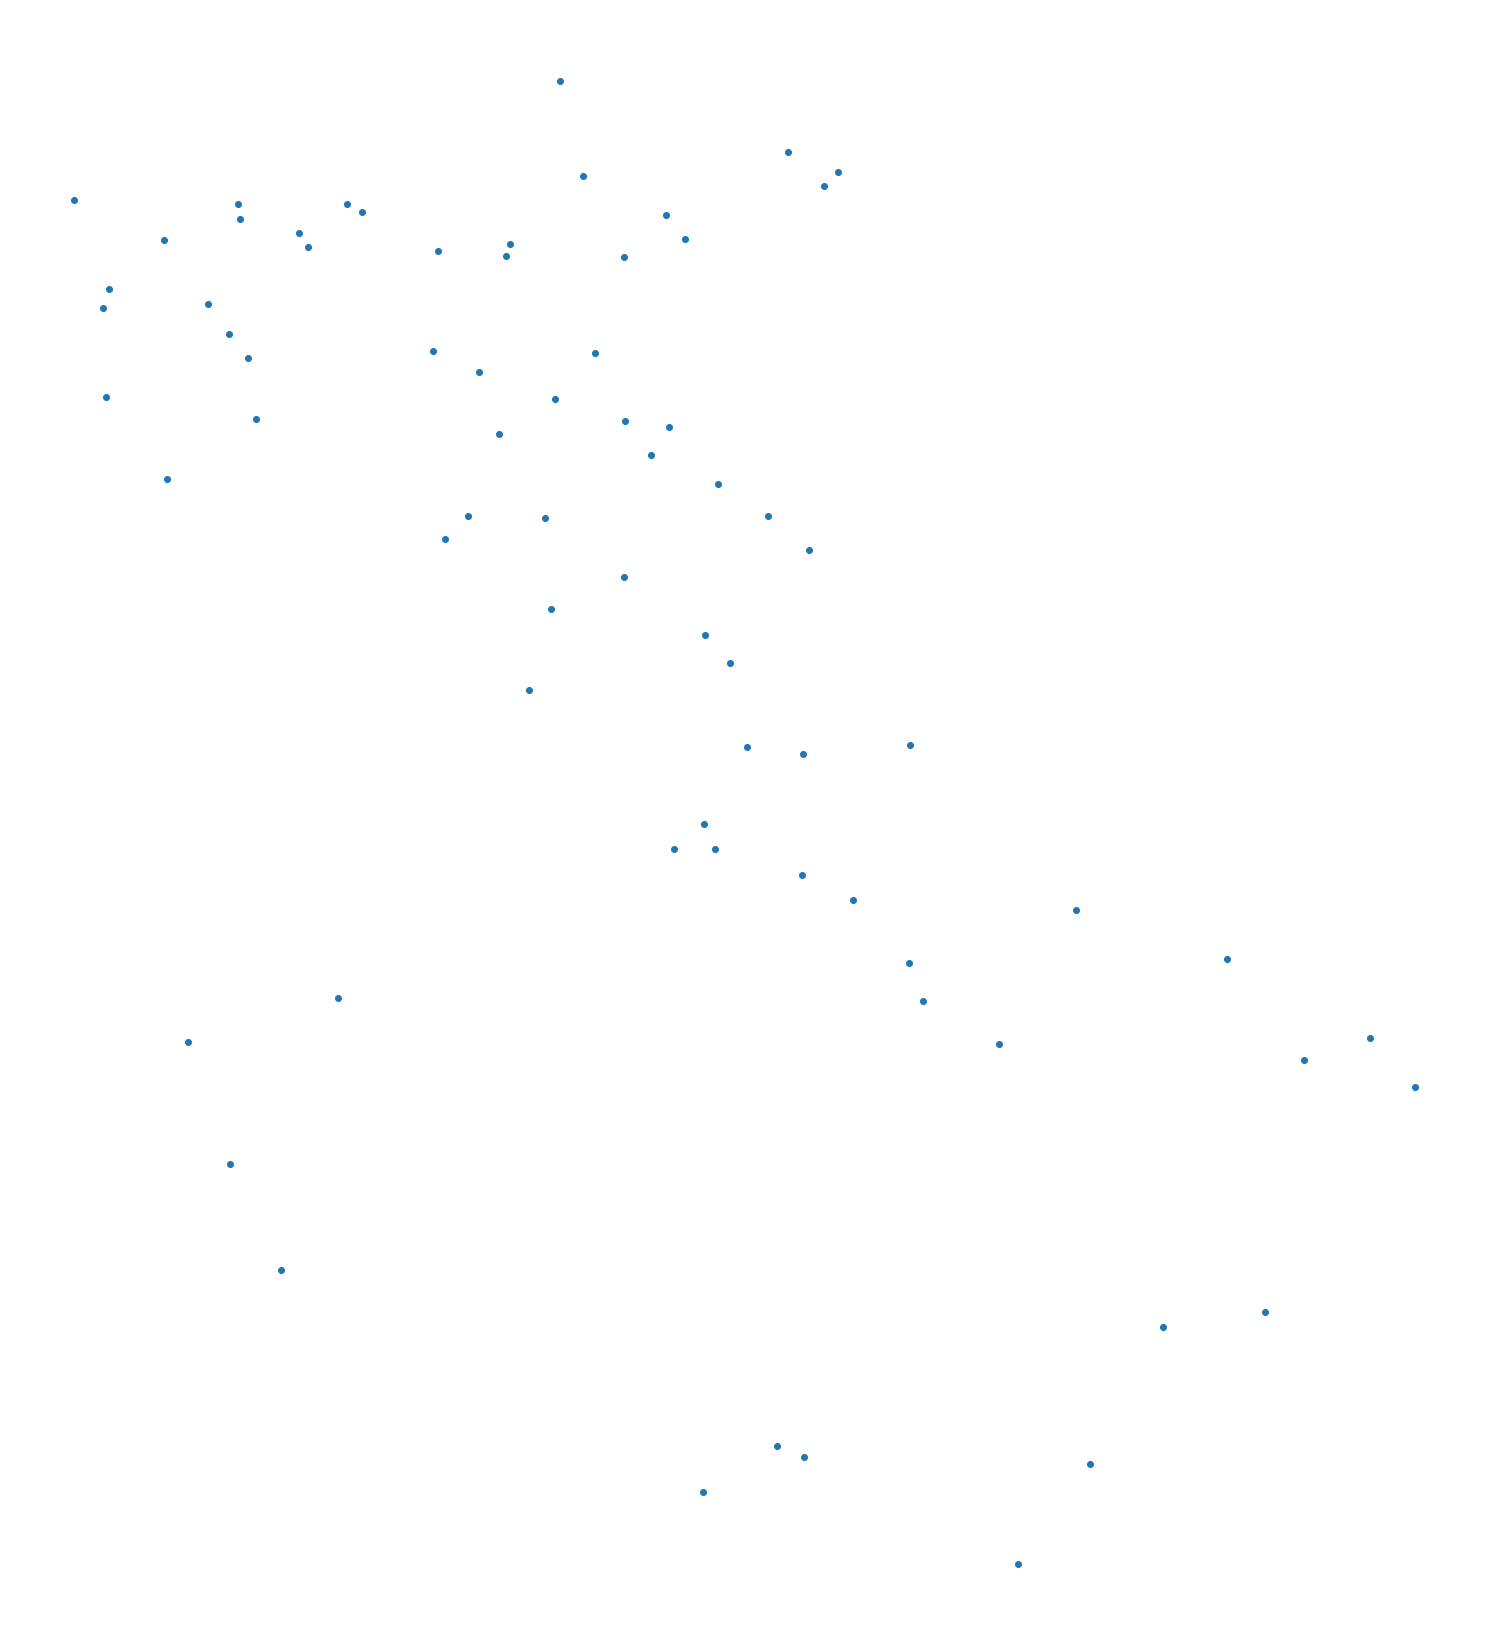

In [8]:
# Set geodata file path
airports = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/AirfldP.shp" 

# Store data
airport_data = gpd.read_file(airports)

# Visualize GeoDataFrame
airport_data.plot(figsize=(30, 30),color="tab:blue").set_axis_off()

## Data Visualization

### Population + Roads

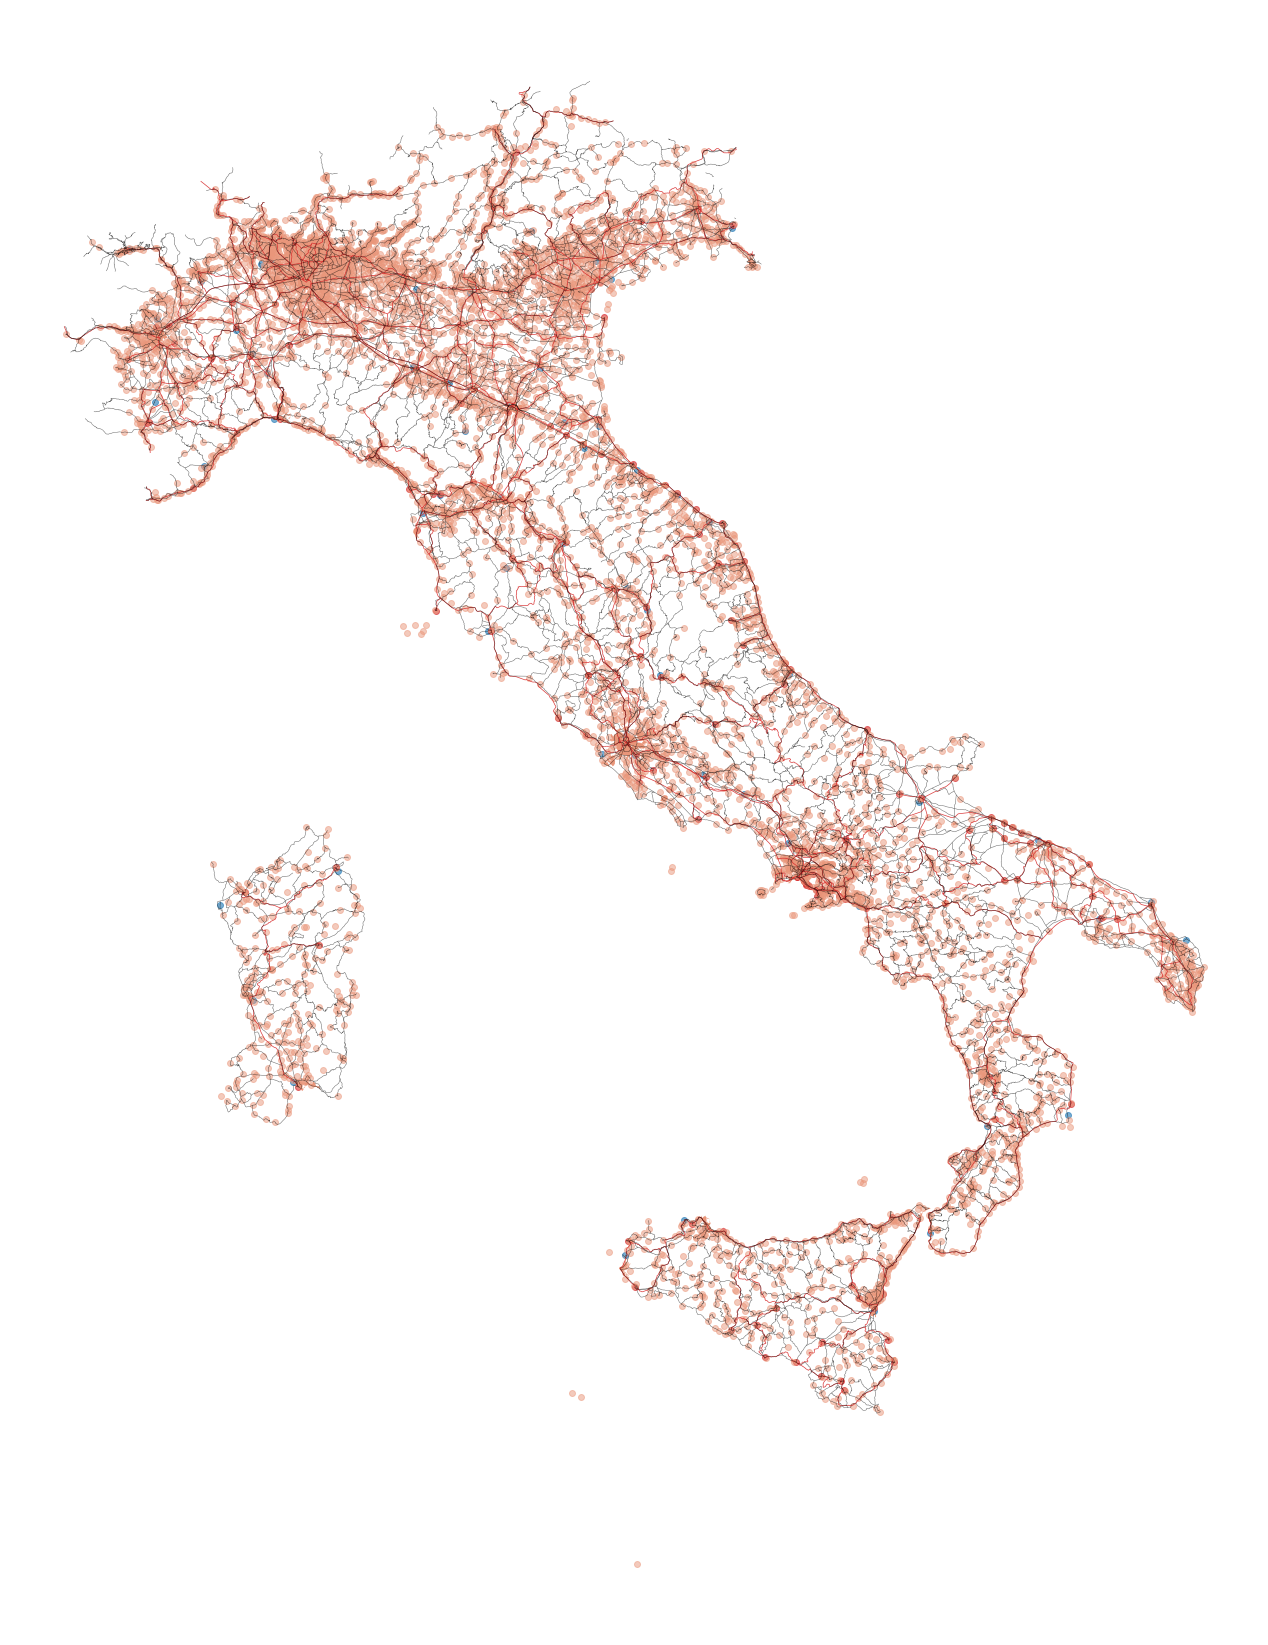

In [9]:
#ax = provincial_data.boundary.plot(figsize=(30, 30), alpha=1,color="black")
ax = airport_data.plot(figsize=(30, 30),color="tab:blue", alpha=0.6)
railway_station_data.plot(ax=ax, color="tab:red", alpha=0.6)
railway_data.plot(ax=ax,color="tab:red",linewidth=0.7, alpha=0.9)
road_data.plot(ax=ax, color="black", linewidth=0.5, alpha=0.6)
builtup1_data.plot(ax=ax, color="darksalmon", linewidth=1, alpha=1)
builtup2_data.plot(ax=ax, color="darksalmon", linewidth=1, alpha=0.5).set_axis_off()

#ax=airport

#builtup1_data.plot(ax=ax, color="darksalmon")
#builtup2_data.plot(ax=ax, color="darksalmon")
#road_data.plot(ax=ax, color="black", linewidth=0.7).set_axis_off()

##### Railways & Railway Stations 

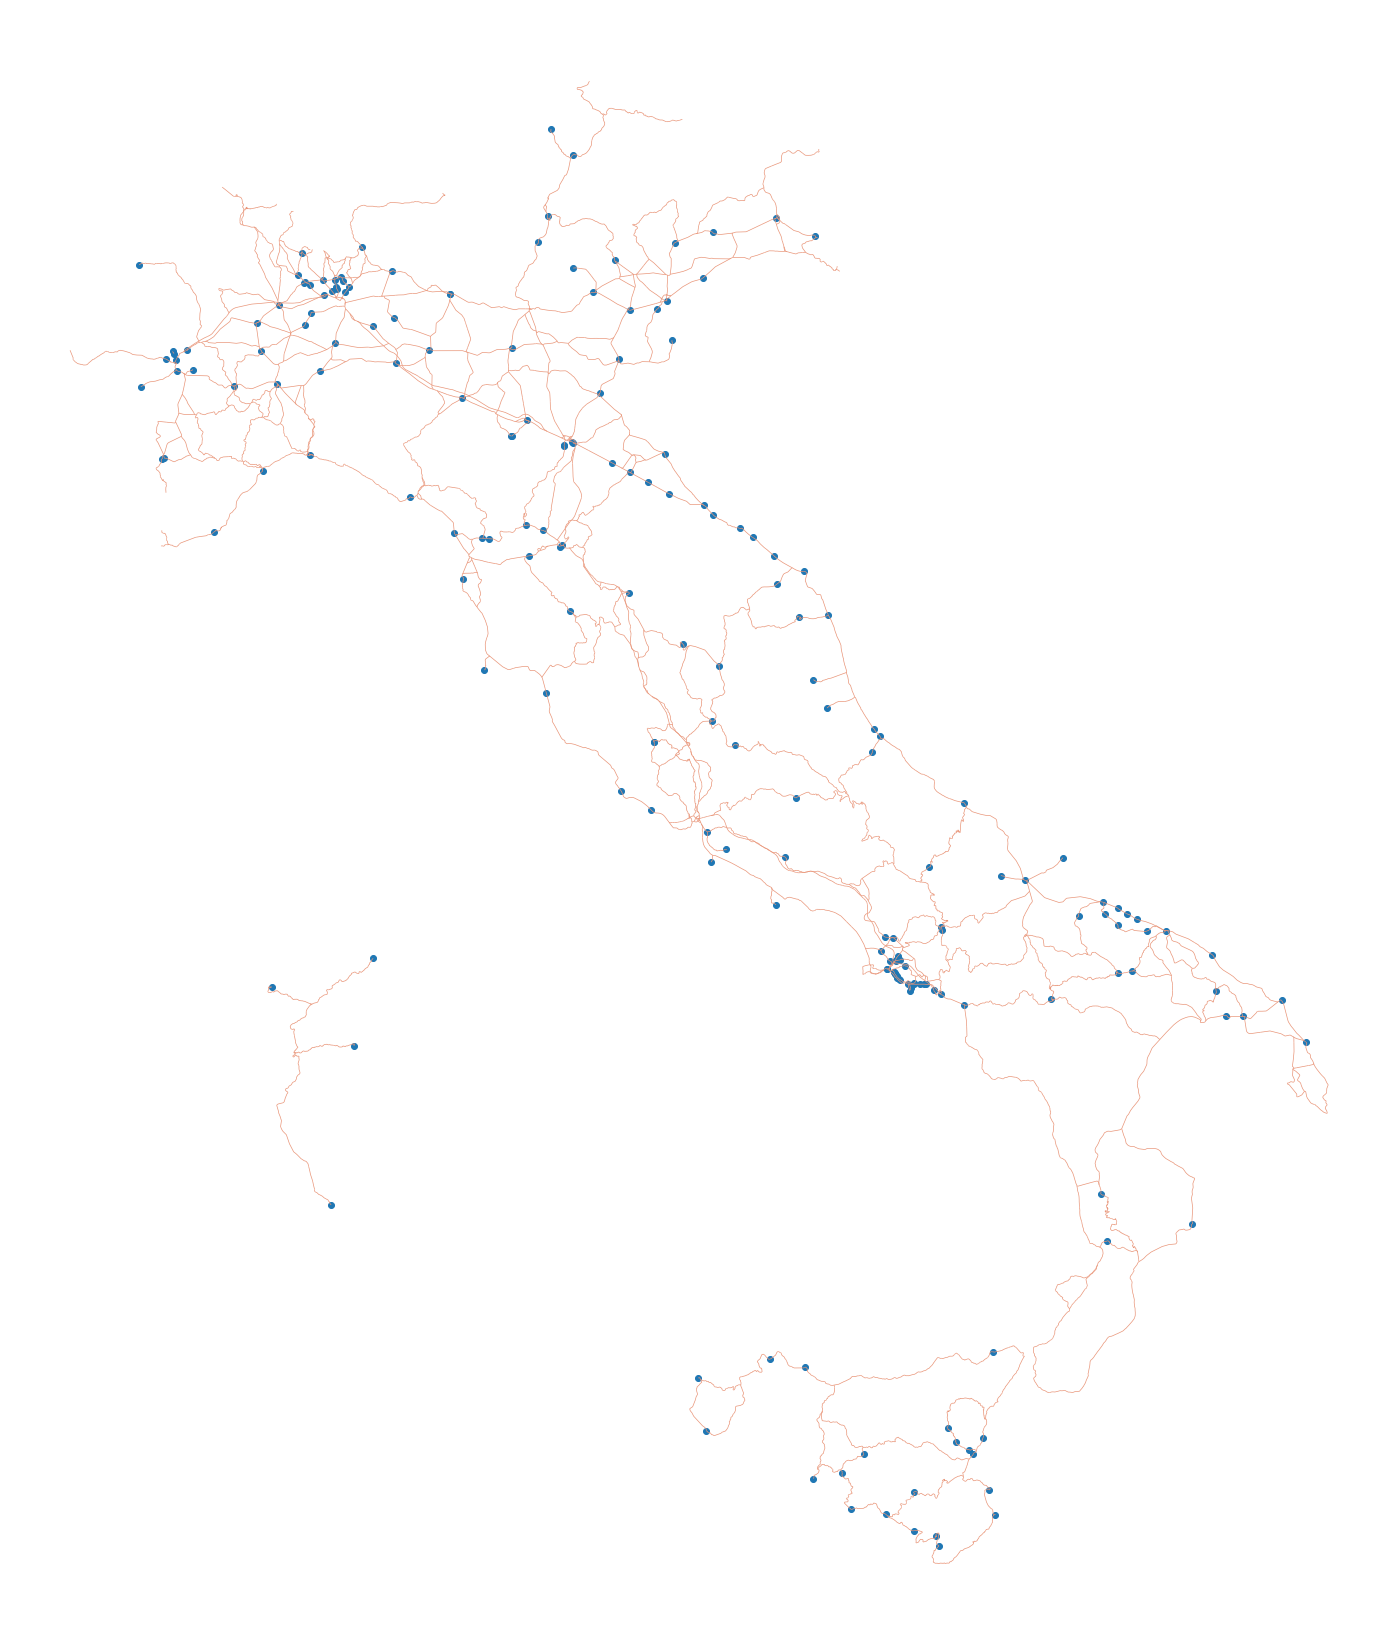

In [10]:
ax = railway_data.plot(figsize=(30, 30),color="darksalmon",linewidth=0.7)
railway_station_data.plot(ax=ax, color="tab:blue").set_axis_off()

### Roads + Airports + Railway Stations 

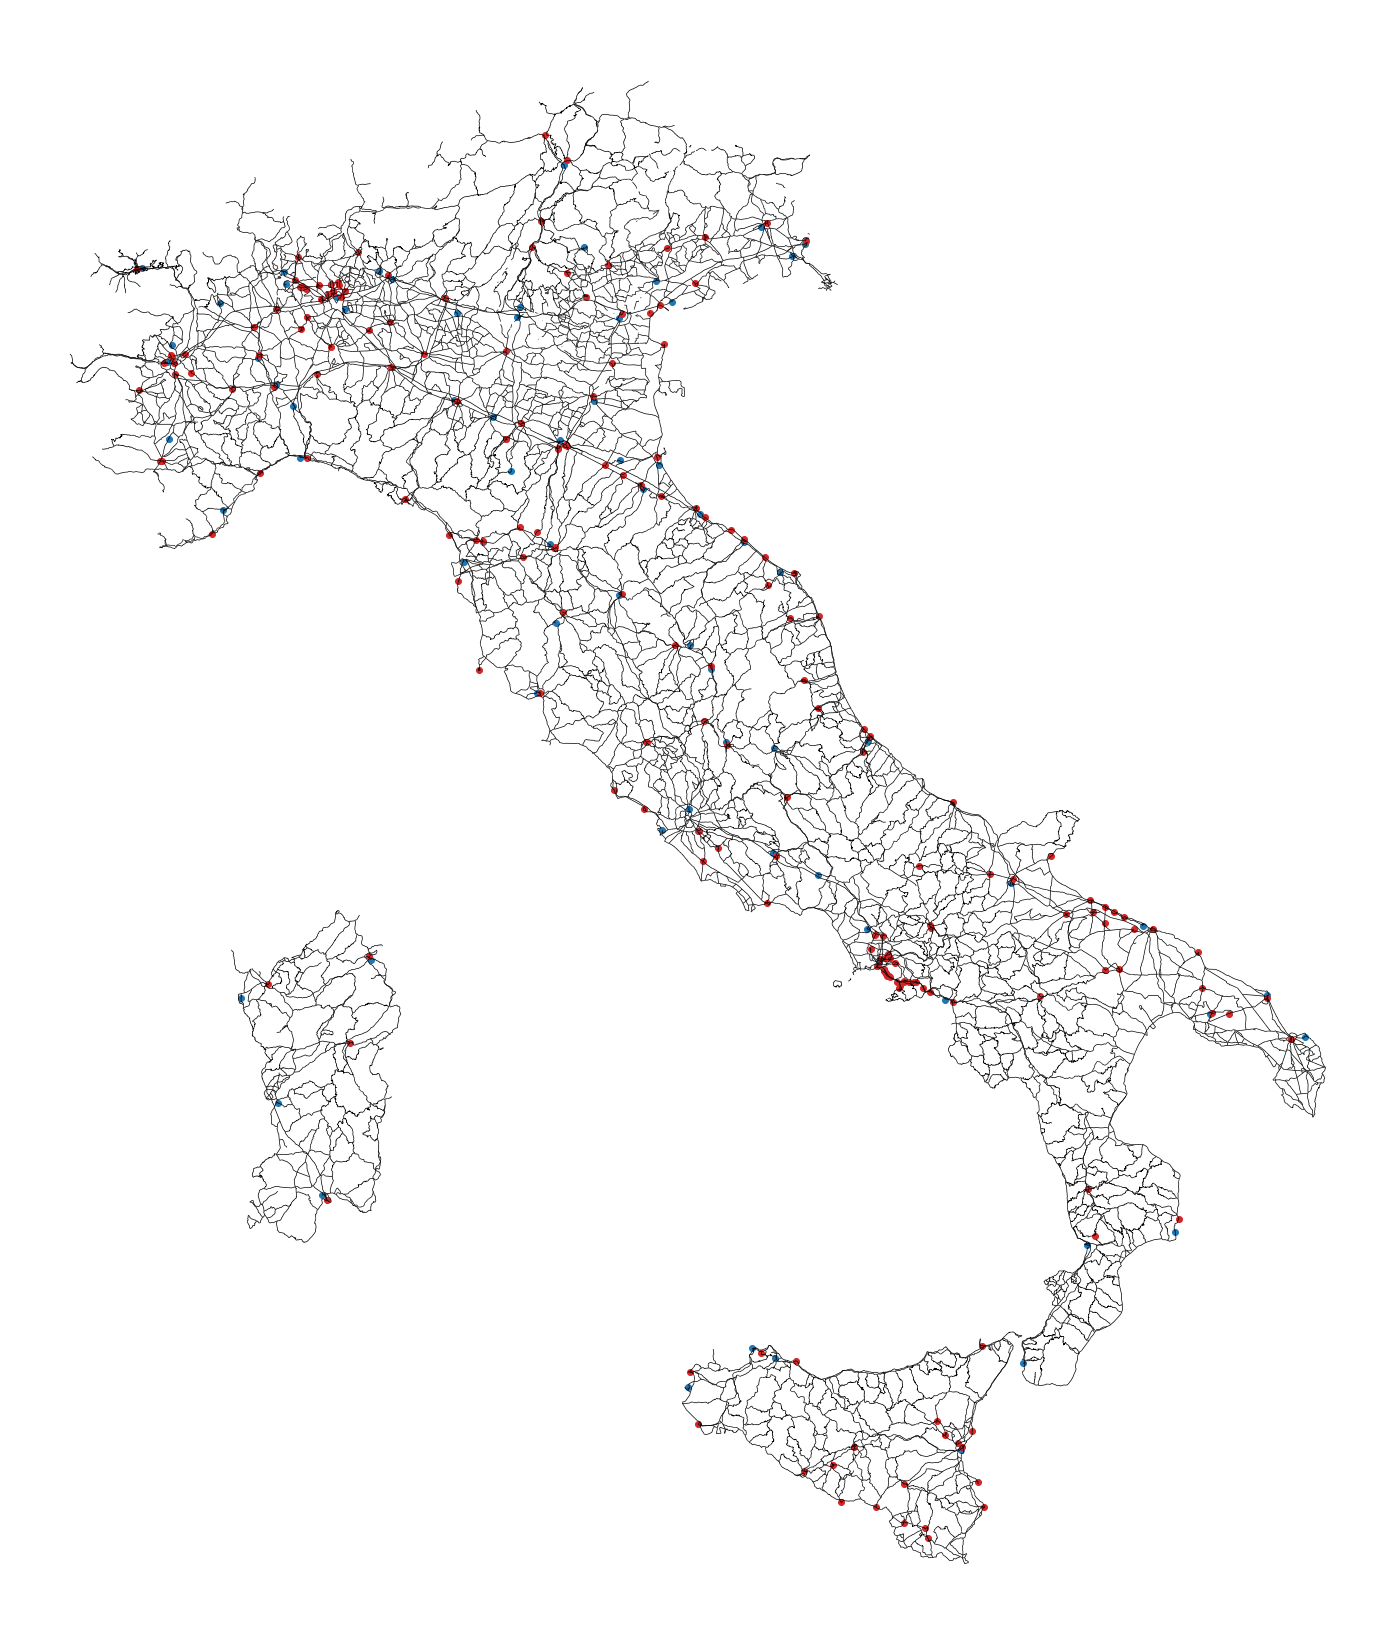

In [11]:
ax = airport_data.plot(figsize=(30, 30),color="tab:blue")
railway_station_data.plot(ax=ax, color="tab:red")
road_data.plot(ax=ax, color="black", linewidth=0.7).set_axis_off()

## Geospatial Graphs 

In [15]:
# Creating a graph from existing files
g = gnx.read_geofiles(railway_stations, railways, directed=True)

KeyError: "None of ['id'] are in the columns"

In [20]:
# Adding nodes and edges to an existing graph
g = gnx.GeoGraph()

In [19]:
g.add_nodes_from_gdf(pd.DataFrame(railway_station_data.geometry)

AttributeError: 'DataFrame' object has no attribute '_geometry_column_name'

In [25]:
g.add_edges_from_gdf(railway_data.geometry)



AttributeError: 'GeoSeries' object has no attribute '_geometry_column_name'

## Geospatial Relations 

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

![](./Tutorial/img/TopologicSpatialRelarions2.png)

In [26]:
provincial_data[provincial_data.NUTS_LABEL == 'Torino']

,inspireId,beginLifes,ICC,NUTS_CODE,NUTS_LABEL,TAA,Shape_Leng,Shape_Area,geometry
21,_EG.EGM.NUTS3:ed2882bd-ba86-4356-ae84-cb23aae1...,2019-02-07,IT,ITC11,Torino,2,6.078369,0.781409,"POLYGON ((7.86058 45.59702, 7.88054 45.59991, ..."


In [27]:
provincial_data[provincial_data.NUTS_LABEL == 'Asti']

,inspireId,beginLifes,ICC,NUTS_CODE,NUTS_LABEL,TAA,Shape_Leng,Shape_Area,geometry
135,_EG.EGM.NUTS3:e07e6211-6aca-470c-b10c-790c383a...,2019-02-07,IT,ITC17,Asti,2,3.519765,0.172165,"POLYGON ((8.03507 45.12877, 8.04599 45.12860, ..."


In [14]:
len(road_data[road_data.intersects(provincial_data.geometry[21]) & road_data.intersects(provincial_data.geometry[135])].geometry)

7

In [45]:
len(builtup2_data[builtup2_data.within(provincial_data.geometry[21])]) == len(builtup2_data[builtup2_data.intersects(provincial_data.geometry[21])])

True

In [38]:
len(road_data[road_data.crosses(provincial_data.geometry[21])]) == len(road_data[road_data.crosses(provincial_data.geometry[21])].geometry.intersects(provincial_data.geometry[21]))
#proof: "crosses" stronger than "intersects"
# crossing lines are liekly to be misleading
# opportunity idea.

True

In [47]:
for
path = nx.path_graph(0)
if road_data.geometry[90].intersects(provincial_data.geometry[0]) == True:
    print(True)

In [28]:
list1= [i for i in range(10)]
list2 = [i for i in range(20)]

In [29]:
p = nx.path_graph(list1)
q = nx.path_graph(list2)

In [30]:
print(p.nodes)
print(q.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [31]:
print(p.edges)
print(q.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)]


In [32]:
g = nx.compose(p,q)

In [33]:
g.nodes == q.nodes

True

In [34]:
g.edges == q.edges

True

In [ ]:
road_graph = nx.Graph()
for road_line in road_data.geometry
    edgelist = []
    path = nx.path_graph(path)
    provinces = [province for province in ]
    for province_area in provincial_data.geometry:
        if road_line.intersects(province_area)==True:
            province_node = province_area.centroid
            
            edgelist.append(edge)
    
    road_graph = nx.compose(road_graph, path)
    

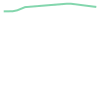

In [88]:
road_data.geometry[0]

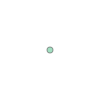

In [75]:
provincial_data.geometry[0].centroid

In [81]:
a = nx.path_graph([])

In [82]:
a.add_edges_from([(0,1), (2,3), (1,2)])

In [84]:
a.nodes

NodeView((0, 1, 2, 3))

In [85]:
a.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

In [121]:
line = road_data.geometry[2]

In [125]:
#for line in road_data.geometry:
province = provincial_data.geometry[16]
provincial_data[provincial_data.intersects(line)].geometry # or .crosses

84    POLYGON ((14.25496 42.44456, 14.26120 42.44013...
Name: geometry, dtype: geometry

In [137]:
road_data[road_data.intersects(province)].geometry # or .crosses

/opt/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


GeoSeries([], Name: geometry, dtype: geometry)

In [141]:
builtup1_data

,FCsubtype,inspireId,beginLifes,F_CODE,ICC,PopulatedP,Shape_Leng,Shape_Area,geometry
0,1,_EG.EGM.BuiltupA:0a4f7724-4c39-4655-bd58-38528...,2017-09-08,AL020,IT,N.IT.BUILTUP.000061,2.168477,0.005650,"POLYGON ((12.47119 37.74463, 12.47117 37.74471..."
1,1,_EG.EGM.BuiltupA:c4e4dbba-86ec-4e0a-9a95-e92c6...,2017-09-08,AL020,IT,N.IT.BUILTUP.000071,0.068450,0.000130,"POLYGON ((9.15091 45.18030, 9.15280 45.18023, ..."
2,1,_EG.EGM.BuiltupA:9784d411-6881-49ea-8ec4-d4630...,2017-09-08,AL020,IT,N.IT.BUILTUP.000049,0.361005,0.001139,"POLYGON ((17.95846 40.66289, 17.95974 40.66285..."
3,1,_EG.EGM.BuiltupA:75f1dee0-bca2-447c-afb7-f395c...,2017-09-08,AL020,IT,N.IT.BUILTUP.000104,0.182791,0.000682,"POLYGON ((16.47630 41.25430, 16.48007 41.25338..."
4,1,_EG.EGM.BuiltupA:4a37242e-881b-4215-8c2a-851bf...,2017-09-08,AL020,IT,N.IT.BUILTUP.000086,0.268171,0.001064,"POLYGON ((12.49889 38.01701, 12.49962 38.01710..."
...,...,...,...,...,...,...,...,...,...
116,1,_EG.EGM.BuiltupA:579f37a7-213f-4aec-b951-013a1...,2016-10-10,AL020,IT,N.IT.BUILTUP.000022,0.255694,0.001489,"POLYGON ((15.56435 41.47612, 15.56331 41.47456..."
117,1,_EG.EGM.BuiltupA:a2211c63-6ca2-438f-aeb7-632dd...,2016-10-10,AL020,IT,N.IT.BUILTUP.000108,0.238112,0.000711,"POLYGON ((14.53083 36.96726, 14.53096 36.96684..."
118,1,_EG.EGM.BuiltupA:9cd348ff-f5e4-45b7-b01d-b61ce...,2016-10-10,AL020,IT,N.IT.BUILTUP.000082,0.122270,0.000601,"POLYGON ((14.30572 40.91162, 14.30713 40.90911..."
119,1,_EG.EGM.BuiltupA:df26e199-94c7-44d7-bccd-7bd15...,2016-10-10,AL020,IT,N.IT.BUILTUP.000077,0.190980,0.000536,"POLYGON ((16.55441 40.83571, 16.55465 40.83486..."


In [6]:
# Set geodata file path
demo = "ftp://ftp.worldpop.org.uk/GIS/Population_Density/Global_2000_2020_1km/2020/ITA/ita_pd_2020_1km.tif"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)

# Store data
demo_data = gpd.read_file(demo)

# Visualize GeoDataFrame
demo_data.plot(figsize=(30, 30),
                     #color='darksalmon', 
                     #edgecolor='black',
                     alpha=1).set_axis_off()

DriverError: '/vsimem/537635efc49a48ef843b8f4d341eca14' not recognized as a supported file format.